In [2]:
from langchain_experimental.utilities import PythonREPL

%load_ext autoreload
%autoreload 2

In [3]:
repl = PythonREPL()

In [4]:
result = repl.run("print(2+2)")
result

Python REPL can execute arbitrary code. Use with caution.


'4\n'

In [5]:
code = """
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

print(df)
"""

result = repl.run(code)
print(result)

   A  B
0  1  4
1  2  5
2  3  6



In [6]:
repl.locals

{'pd': <module 'pandas' from '/home/miguel-conde/Documents/tst_ai_ds_team/.venv/lib/python3.12/site-packages/pandas/__init__.py'>,
 'df':    A  B
 0  1  4
 1  2  5
 2  3  6}

In [7]:
code ="""
df2 = 2*df
print(df2)
"""

repl.run(code)

'   A   B\n0  2   8\n1  4  10\n2  6  12\n'

In [8]:
repl.locals

{'pd': <module 'pandas' from '/home/miguel-conde/Documents/tst_ai_ds_team/.venv/lib/python3.12/site-packages/pandas/__init__.py'>,
 'df':    A  B
 0  1  4
 1  2  5
 2  3  6,
 'df2':    A   B
 0  2   8
 1  4  10
 2  6  12}

In [9]:
import numpy as np

code = """
import numpy as np

df_large = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))
print(df_large)
"""

print(repl.run(code))

            A         B         C         D
0   -2.488781 -2.871466 -1.176613  0.968948
1    0.524692  0.367521  0.527752 -0.971225
2   -1.788741  2.300228  0.950232  0.989780
3   -0.130837 -0.695572 -1.478241  0.467541
4    2.492005 -1.094819 -1.411099 -1.092065
..        ...       ...       ...       ...
995  1.388291  1.718549  1.090118 -0.833593
996 -1.570319  0.460335 -0.155574  0.272982
997 -0.651512 -1.217896 -0.607998  1.153189
998  1.094747  0.870000  0.252042 -1.831994
999  1.387484 -0.269143 -0.801775  1.320217

[1000 rows x 4 columns]



In [10]:
repl.locals

{'pd': <module 'pandas' from '/home/miguel-conde/Documents/tst_ai_ds_team/.venv/lib/python3.12/site-packages/pandas/__init__.py'>,
 'df':    A  B
 0  1  4
 1  2  5
 2  3  6,
 'df2':    A   B
 0  2   8
 1  4  10
 2  6  12,
 'np': <module 'numpy' from '/home/miguel-conde/Documents/tst_ai_ds_team/.venv/lib/python3.12/site-packages/numpy/__init__.py'>,
 'df_large':             A         B         C         D
 0   -2.488781 -2.871466 -1.176613  0.968948
 1    0.524692  0.367521  0.527752 -0.971225
 2   -1.788741  2.300228  0.950232  0.989780
 3   -0.130837 -0.695572 -1.478241  0.467541
 4    2.492005 -1.094819 -1.411099 -1.092065
 ..        ...       ...       ...       ...
 995  1.388291  1.718549  1.090118 -0.833593
 996 -1.570319  0.460335 -0.155574  0.272982
 997 -0.651512 -1.217896 -0.607998  1.153189
 998  1.094747  0.870000  0.252042 -1.831994
 999  1.387484 -0.269143 -0.801775  1.320217
 
 [1000 rows x 4 columns]}

In [11]:
print(repl.run("print(df_large.describe())"))

                 A            B            C            D
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.050615     0.017486     0.011964    -0.002636
std       1.007671     1.009666     0.966732     0.989639
min      -3.343154    -2.973550    -2.850838    -4.127263
25%      -0.730217    -0.615437    -0.651510    -0.705619
50%      -0.051976    -0.003318     0.018557     0.033794
75%       0.648032     0.665000     0.625425     0.651541
max       2.934594     3.405950     3.314492     2.885326



In [12]:
print(repl.run("print(df_large.info())"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
 3   D       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB
None



In [13]:
from langchain_experimental.utilities import PythonREPL

class CodeExecutor():
    """
    A class to execute Python code within a REPL environment and manage its local and global variables.
    
    
    """
    
    def __init__(self):
        """
        Initializes a new instance of the class.

        Attributes:
            repl (PythonREPL): An instance of the PythonREPL class.
        """
        self.repl = PythonREPL()
        
    def execute(self, code):
        """
        Executes the given code in the REPL (Read-Eval-Print Loop) environment.

        Args:
            code (str): The code to be executed.

        Returns:
            The result of executing the code in the REPL environment.
        """
        return self.repl.run(code)
    
    def print_var(self, var_name):
        """
        Prints the value of a variable in the REPL (Read-Eval-Print Loop) environment.

        Args:
            var_name (str): The name of the variable to print.

        Returns:
            None
        """
        print(self.repl.locals.get(var_name, f'Variable "{var_name}" not found'))
    
    def get_locals(self):
        """
        Retrieve the local variables from the REPL (Read-Eval-Print Loop) environment.

        Returns:
            dict: A dictionary containing the local variables in the REPL environment.
        """
        return self.repl.locals
    
    def set_locals(self, locals):
        """
        Sets the local variables for the REPL (Read-Eval-Print Loop) environment.

        Parameters:
        locals (dict): A dictionary containing the local variables to be set in the REPL environment.
        """
        self.repl.locals = locals
    
    def reset_locals(self):
        """
        Resets the local variables in the REPL (Read-Eval-Print Loop) environment.

        This method clears all the local variables stored in the REPL's local
        namespace by setting it to an empty dictionary.
        """
        self.repl.locals = {}
        
    def get_globals(self):
        """
        Retrieve the global variables from the REPL (Read-Eval-Print Loop) environment.

        Returns:
            dict: A dictionary containing the global variables.
        """
        return self.repl.globals
    
    def set_globals(self, globals):
        """
        Sets the global variables for the REPL (Read-Eval-Print Loop) environment.

        Args:
            globals (dict): A dictionary containing global variables to be set in the REPL environment.
        """
        self.repl.globals = globals
        
    def reset_globals(self):
        """
        Resets the global variables in the REPL (Read-Eval-Print Loop) environment.

        This method clears the `globals` dictionary of the `repl` attribute, effectively
        removing all global variables and resetting the environment to its initial state.
        """
        self.repl.globals = {}
        
    def get_all(self):
        """
        Retrieve all local and global variables from the REPL environment.

        Returns:
            tuple: A tuple containing two dictionaries:
                - locals (dict): Local variables in the REPL environment.
                - globals (dict): Global variables in the REPL environment.
        """
        return self.repl.locals, self.repl.globals
    
    def set_all(self, locals, globals):
        """
        Set the local and global variables for the REPL (Read-Eval-Print Loop) environment.

        Parameters:
        locals (dict): A dictionary representing the local variables.
        globals (dict): A dictionary representing the global variables.
        """
        self.repl.locals = locals
        self.repl.globals = globals
        
    def reset_all(self):
        """
        Resets the REPL (Read-Eval-Print Loop) environment by clearing all local and global variables.
        
        This method sets the `locals` and `globals` dictionaries of the REPL to empty dictionaries,
        effectively removing all previously defined variables and functions.
        """
        self.repl.locals = {}
        self.repl.globals = {}

class ArithmeticCalculator(CodeExecutor):
    """
    A class to perform basic arithmetic operations using dynamic code execution.
    Methods
    -------
    add(a, b):
        Adds two numbers and prints the result.
    subtract(a, b):
        Subtracts the second number from the first and prints the result.
    multiply(a, b):
        Multiplies two numbers and prints the result.
    divide(a, b):
        Divides the first number by the second and prints the result.
    power(a, b):
        Raises the first number to the power of the second and prints the result.
    run_code(code):
        Execute the given code in the calculator environment.
    get_calculator_locals():
        Get the local variables in the calculator environment.
    get_calculator_globals():
        Get the global variables in the calculator environment.
    get_calculator_all():
        Get all local and global variables in the calculator environment
    """
    
    def __init__(self):
        """
        Initializes a new instance of the class.
        """
        super().__init__()
        
    def add(self, a, b):
        """Adds two numbers and prints the result.

        This method dynamically generates and executes code to add two numbers.
        If an exception occurs during the addition, it catches the exception and 
        prints an error message.

        Parameters:
            a (int or float): The first number to add.
            b (int or float): The second number to add.

        Returns:
            None
        """
        
        code = f"""
try:
    result = {a} + {b}
except Exception as e:
    result = f'ERROR: {{e}}'
"""
        self.execute(code)
        self.print_var('result')
    
    def subtract(self, a, b):
        """Subtracts the second number from the first and prints the result.
        
        This method dynamically generates and executes code to subtract the second number
        from the first number. If an exception occurs during the subtraction, it catches
        the exception and prints an error message.
        
        Parameters:
            a (int or float): The first number.
            b (int or float): The second number.
        
        Returns:
            None
        """
        
        code = f"""
try:
    result = {a} - {b}
except Exception as e:
    result = f'ERROR: {{e}}'
"""
        self.execute(code)
        self.print_var('result')
    
    def multiply(self, a, b): 
        """Multiplies two numbers and prints the result.
        
        This method dynamically generates and executes code to multiply two numbers.
        If an exception occurs during the multiplication, it catches the exception and
        prints an error message.
        
        Parameters:
            a (int or float): The first number.
            b (int or float): The second number.
            
        Returns:
            None
        """
        
        code = f"""
try:
    result = {a} * {b}
except Exception as e:
    result = f'ERROR: {{e}}'
"""
        self.execute(code)
        self.print_var('result') 
    
    def divide(self, a, b):
        """Divides the first number by the second and prints the result.
        
        This method dynamically generates and executes code to divide the first number
        by the second number. If an exception occurs during the division, it catches
        the exception and prints an error message.
        
        Parameters:
            a (int or float): The numerator.
            b (int or float): The denominator.
            
        Returns:
            None
        """
        
        code = f"""
try:
    result = {a} / {b}
except Exception as e:
    result = f'ERROR: {{e}}'
"""
        self.execute(code)
        self.print_var('result')
    
    def power(self, a, b):
        """Calculate the power of a number.

        This method calculates the result of raising `a` to the power of `b`.
        If an exception occurs during the calculation, it captures the exception
        and stores an error message in the result.

        Args:
            a (int or float): The base number.
            b (int or float): The exponent.

        Returns:
            None: The result is printed and not returned directly.
        code = f
        """
        
        code = f"""
try:
    result = {a} ** {b}
except Exception as e:
    result = f'ERROR: {{e}}'
"""
        self.execute(code)
        self.print_var('result')
        
    def run_code(self, code):
        """Execute the given code in the calculator environment.
        
        This method must be used ONLY for different operations that are not covered by the existing methods.

        Args:
            code (str): The Python code to execute.
        """
        self.execute(code)
        
    def get_calculator_locals(self):
        """Get the local variables in the calculator environment.

        Returns:
            dict: A dictionary containing the local variables in the calculator environment.
        """
        return self.get_locals()
    
    def get_calculator_globals(self):
        """Get the global variables in the calculator environment.
        
        Returns:
            dict: A dictionary containing the global variables in the calculator environment
        """
        return self.get_globals()
    
    def get_calculator_all(self):
        """Get all local and global variables in the calculator environment.
        
        Returns:
            tuple: A tuple containing two dictionaries:
                - locals (dict): Local variables in the calculator environment.
                - globals (dict): Global variables in the calculator environment.
        """
        
        return self.get_all()
        
        

In [14]:
calculator = ArithmeticCalculator()

calculator.add(2, 2)

4


In [15]:
calculator.get_locals()

{'result': 4}

In [16]:
calculator.add(2, 'a')

ERROR: name 'a' is not defined


In [17]:
from langchain_openai import ChatOpenAI

tools = [ArithmeticCalculator]

from arithmetics import add, subtract, multiply, divide, power, run_code, get_calculator_locals, get_calculator_globals, get_calculator_all

tools = [add, subtract, multiply, divide, power, run_code, get_calculator_locals, get_calculator_globals, get_calculator_all]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [18]:
llm_with_tools.invoke("add 2 and 2")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wXJv39m9XfpAWkkG9evYCdQw', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 652, 'total_tokens': 670, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-dd063efd-2006-4b05-be62-13cd1f5cf2d7-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'call_wXJv39m9XfpAWkkG9evYCdQw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 652, 'output_tokens': 18, 'total_tokens': 670, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [19]:
llm_with_tools.invoke("multiply that 7 times")

AIMessage(content='Could you please clarify which number you would like me to multiply 7 with?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 651, 'total_tokens': 669, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'stop', 'logprobs': None}, id='run-1f545e2e-1b14-486f-85d4-0e0821c60a8d-0', usage_metadata={'input_tokens': 651, 'output_tokens': 18, 'total_tokens': 669, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [20]:
llm_with_tools.invoke("Specify all the functions you know about")

AIMessage(content="I have access to a set of functions related to basic arithmetic operations and code execution in a calculator environment. Here's a list of the functions:\n\n1. **add**: Adds two numbers and prints the result.\n\n2. **subtract**: Subtracts the second number from the first and prints the result.\n\n3. **multiply**: Multiplies two numbers and prints the result.\n\n4. **divide**: Divides the first number by the second and prints the result.\n\n5. **power**: Calculates the power of a number.\n\n6. **run_code**: Executes given code in the calculator environment for operations not covered by existing methods.\n\n7. **get_calculator_locals**: Retrieves the local variables in the calculator environment.\n\n8. **get_calculator_globals**: Retrieves the global variables in the calculator environment.\n\n9. **get_calculator_all**: Retrieves all local and global variables in the calculator environment.\n\nAdditionally, there is a tool called **multi_tool_use.parallel** that allow

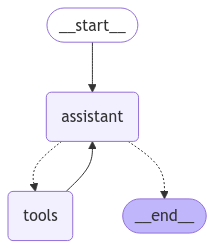

In [21]:
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

from typing import Dict, List, Union

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing EDA.")

# class CalculatorSchema(MessagesState):
#     execution_environment: Dict

class CalculatorSchema(Dict):
    messages: List[Union[AIMessage, HumanMessage, SystemMessage]]
    execution_environment: Dict

# Node
def assistant(state: CalculatorSchema):
   return {
       "messages": [llm_with_tools.invoke([sys_msg] + state["messages"])],
       "execution_environment": llm_with_tools.invoke(HumanMessage("Get the current execution environment")),
       }

from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

memory = MemorySaver()

calculator_agent = builder.compile(checkpointer=memory)

# Show
display(Image(calculator_agent.get_graph(xray=True).draw_mermaid_png()))

In [22]:
# Specify a thread
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="Add 3 and 4.")]

# Run
messages = calculator_agent.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

ValueError: Invalid input type <class 'langchain_core.messages.human.HumanMessage'>. Must be a PromptValue, str, or list of BaseMessages.

In [25]:
calculator_agent.get_state(config).values

{'messages': [HumanMessage(content='Add 3 and 4.', additional_kwargs={}, response_metadata={}, id='e4b3b134-5921-4665-9ee7-9dbb64ae2595'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_OFRt5Emi6sQBiNWxILTe1Vcs', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 646, 'total_tokens': 664, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-820fad32-8ed2-4e24-8805-85f555e23325-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 4}, 'id': 'call_OFRt5Emi6sQBiNWxILTe1Vcs', 'type': 'tool_call'}], usage_metadata={'input_tokens': 646, 'output_tokens': 18, 'total_t

In [26]:
messages = [HumanMessage(content="Multiply that by 2.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

14
================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_OFRt5Emi6sQBiNWxILTe1Vcs)
 Call ID: call_OFRt5Emi6sQBiNWxILTe1Vcs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

null
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uYEZp79qU7Ocjasu1qE9VpeF)
 Call ID: call_uYEZp79qU7Ocjasu1qE9VpeF
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

null
================================== Ai Message ==================================

The

In [27]:
messages = [HumanMessage(content="Make a random dataframe with 10 rows and 3 columns.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_OFRt5Emi6sQBiNWxILTe1Vcs)
 Call ID: call_OFRt5Emi6sQBiNWxILTe1Vcs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

null
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uYEZp79qU7Ocjasu1qE9VpeF)
 Call ID: call_uYEZp79qU7Ocjasu1qE9VpeF
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

null
================================== Ai Message ==================================

The re

In [28]:
messages = [HumanMessage(content="Show me the generated dataframe")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_OFRt5Emi6sQBiNWxILTe1Vcs)
 Call ID: call_OFRt5Emi6sQBiNWxILTe1Vcs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

null
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uYEZp79qU7Ocjasu1qE9VpeF)
 Call ID: call_uYEZp79qU7Ocjasu1qE9VpeF
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

null
================================== Ai Message ==================================

The re

In [29]:
messages = [HumanMessage(content="Tell me what local variables you have in your execution environment")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_OFRt5Emi6sQBiNWxILTe1Vcs)
 Call ID: call_OFRt5Emi6sQBiNWxILTe1Vcs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

null
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uYEZp79qU7Ocjasu1qE9VpeF)
 Call ID: call_uYEZp79qU7Ocjasu1qE9VpeF
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

null
================================== Ai Message ==================================

The re

In [30]:
messages = [HumanMessage(content="Tell me all the tools at your hand. Use a markdown table formart to display the tools.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_OFRt5Emi6sQBiNWxILTe1Vcs)
 Call ID: call_OFRt5Emi6sQBiNWxILTe1Vcs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

null
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uYEZp79qU7Ocjasu1qE9VpeF)
 Call ID: call_uYEZp79qU7Ocjasu1qE9VpeF
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

null
================================== Ai Message ==================================

The re

In [31]:
messages = [HumanMessage(content="Add 3 and 4. Divide that by 2. Multiply that by 3. Subtract 2 from that.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

10.510.5

8.5
8.5
================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_OFRt5Emi6sQBiNWxILTe1Vcs)
 Call ID: call_OFRt5Emi6sQBiNWxILTe1Vcs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

null
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uYEZp79qU7Ocjasu1qE9VpeF)
 Call ID: call_uYEZp79qU7Ocjasu1qE9VpeF
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

null
================================== Ai Message ========================

In [32]:
messages = [HumanMessage(content=" Retrieve the local variables from the REPL")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_OFRt5Emi6sQBiNWxILTe1Vcs)
 Call ID: call_OFRt5Emi6sQBiNWxILTe1Vcs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

null
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uYEZp79qU7Ocjasu1qE9VpeF)
 Call ID: call_uYEZp79qU7Ocjasu1qE9VpeF
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

null
================================== Ai Message ==================================

The re

In [33]:
messages = [HumanMessage(content="Ejecuta tu funcion 'execute' con el codigo necesario para generar 100 numeros aleatorios de una distribución uniforme entre 0 y 1 y guardalos en una variable llamada 'random_data'. Muestramela.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_OFRt5Emi6sQBiNWxILTe1Vcs)
 Call ID: call_OFRt5Emi6sQBiNWxILTe1Vcs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

null
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uYEZp79qU7Ocjasu1qE9VpeF)
 Call ID: call_uYEZp79qU7Ocjasu1qE9VpeF
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

null
================================== Ai Message ==================================

The re

In [36]:
calculator_agent.get_state(config).values['execution_environment']

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jA0UzDgfyfMROmHsqrQobuXa', 'function': {'arguments': '{}', 'name': 'get_calculator_all'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 633, 'total_tokens': 646, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-32858f43-059a-4d2d-be52-e40abc26df9b-0', tool_calls=[{'name': 'get_calculator_all', 'args': {}, 'id': 'call_jA0UzDgfyfMROmHsqrQobuXa', 'type': 'tool_call'}], usage_metadata={'input_tokens': 633, 'output_tokens': 13, 'total_tokens': 646, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [42]:
# generate a rando dataframe
import pandas as pd
import numpy as np

def kkk():
    df = pd.DataFrame(np.random.rand(100, 4), columns=list('ABCD'))

    kk = print(df)
    
    return(kk)

res = kkk()

           A         B         C         D
0   0.288912  0.630224  0.854738  0.565194
1   0.471416  0.913115  0.238496  0.599559
2   0.855057  0.504124  0.712173  0.258766
3   0.055358  0.680497  0.339643  0.451065
4   0.325227  0.525766  0.885417  0.350056
..       ...       ...       ...       ...
95  0.946981  0.297707  0.451827  0.274080
96  0.778173  0.149465  0.394817  0.504278
97  0.654046  0.266509  0.650741  0.182632
98  0.380852  0.609996  0.705653  0.057539
99  0.346786  0.063130  0.271020  0.553920

[100 rows x 4 columns]


In [43]:
type (res)

NoneType